In [331]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")
plt.style.use('ggplot')

In [332]:
df = pd.read_csv('credit_default_train.csv', sep=',')
df.head()

,id,credit_limit,gender,education,marital_status,age,pay_past_1,pay_past_2,pay_past_3,pay_past_4,...,bill_past_4,bill_past_5,bill_past_6,repay_past_1,repay_past_2,repay_past_3,repay_past_4,repay_past_5,repay_past_6,default_next_month
0,24001,250000,2,1,2,37,0,0,-1,-1,...,9163,8338,17793,1007,13346,9163,8338,18618,1763,0
1,24000,160000,2,1,2,29,1,-1,-1,-1,...,550,2602,10381,17833,2252,9694,10000,11797,7289,0
2,23999,250000,1,1,1,41,-1,-1,-1,-1,...,1130,1683,2587,390,390,1130,1683,2587,0,1
3,23998,260000,1,1,1,36,0,0,0,0,...,193555,197090,200841,9029,9000,7100,7509,8000,6888,1
4,23997,50000,2,1,2,24,-1,-1,-1,-1,...,7999,-66,6784,1054,0,8000,0,6850,11000,1


In [333]:
df.columns

Index(['id', 'credit_limit', 'gender', 'education', 'marital_status', 'age',
       'pay_past_1', 'pay_past_2', 'pay_past_3', 'pay_past_4', 'pay_past_5',
       'pay_past_6', 'bill_past_1', 'bill_past_2', 'bill_past_3',
       'bill_past_4', 'bill_past_5', 'bill_past_6', 'repay_past_1',
       'repay_past_2', 'repay_past_3', 'repay_past_4', 'repay_past_5',
       'repay_past_6', 'default_next_month'],
      dtype='object')

### DESCRIPTION AND VISUALIZATION

In [334]:
print(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 25 columns):
id                    24001 non-null int64
credit_limit          24001 non-null int64
gender                24001 non-null int64
education             24001 non-null int64
marital_status        24001 non-null int64
age                   24001 non-null int64
pay_past_1            24001 non-null int64
pay_past_2            24001 non-null int64
pay_past_3            24001 non-null int64
pay_past_4            24001 non-null int64
pay_past_5            24001 non-null int64
pay_past_6            24001 non-null int64
bill_past_1           24001 non-null int64
bill_past_2           24001 non-null int64
bill_past_3           24001 non-null int64
bill_past_4           24001 non-null int64
bill_past_5           24001 non-null int64
bill_past_6           24001 non-null int64
repay_past_1          24001 non-null int64
repay_past_2          24001 non-null int64
repay_past_3          24001 non

In [335]:
features = list(df.columns)
print(features)

['id', 'credit_limit', 'gender', 'education', 'marital_status', 'age', 'pay_past_1', 'pay_past_2', 'pay_past_3', 'pay_past_4', 'pay_past_5', 'pay_past_6', 'bill_past_1', 'bill_past_2', 'bill_past_3', 'bill_past_4', 'bill_past_5', 'bill_past_6', 'repay_past_1', 'repay_past_2', 'repay_past_3', 'repay_past_4', 'repay_past_5', 'repay_past_6', 'default_next_month']


In [336]:
print(df.gender.unique())
df.gender.value_counts(normalize=True)*100

[2 1]


2    60.280822
1    39.719178
Name: gender, dtype: float64

In [337]:
print(df.education.unique())
df.education.value_counts(normalize=True)*100

[1 2 3 4 0]


2    46.723053
1    35.240198
3    16.461814
4     1.533269
0     0.041665
Name: education, dtype: float64

In [338]:
print(df.marital_status.unique())
df.marital_status.value_counts(normalize=True)*100


[2 1 3]


2    53.160285
1    45.556435
3     1.283280
Name: marital_status, dtype: float64

In [339]:
print(df.age.unique())

[37 29 41 36 24 44 42 28 35 59 27 32 30 45 22 55 40 43 39 47 49 56 21 54
 57 26 34 25 31 23 33 46 50 38 62 51 58 52 60 53 48 64 63 68 61 67 70 66
 65 69 71 73 75 72 74 79]


In [340]:
print(df.pay_past_1.unique())
df.pay_past_4.value_counts(normalize=True)*100

[ 0  1 -1  2 -2  4  3  5  7  8  6]


 0    55.068539
-1    18.957543
-2    14.449398
 2    10.403733
 3     0.554144
 4     0.224991
 7     0.191659
 5     0.116662
 6     0.016666
 8     0.008333
 1     0.008333
Name: pay_past_4, dtype: float64

[0 1]
0    77.880088
1    22.119912
Name: default_next_month, dtype: float64


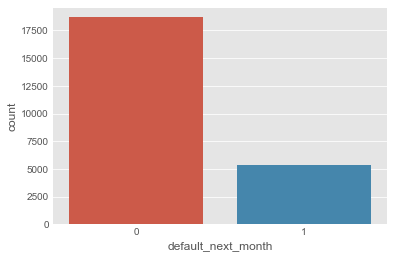

In [341]:
print(df.default_next_month.unique())
print(df.default_next_month.value_counts(normalize=True)*100)
sns.countplot(x=df.default_next_month, data = df)

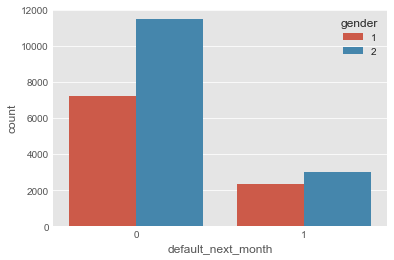

In [342]:
sns.countplot(x='default_next_month', hue='gender', data=df)

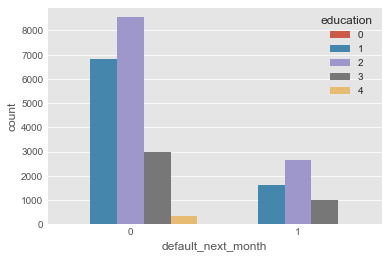

In [343]:
sns.countplot(x='default_next_month', hue='education', data=df)

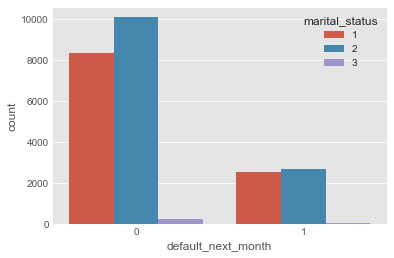

In [344]:
sns.countplot(x='default_next_month', hue='marital_status', data=df)

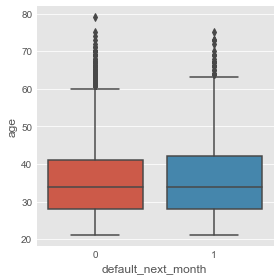

In [345]:
sns.factorplot(y='age', x='default_next_month',  data=df, kind='box')


Text(0.5,1,'Heatmap of Correlation Matrix')

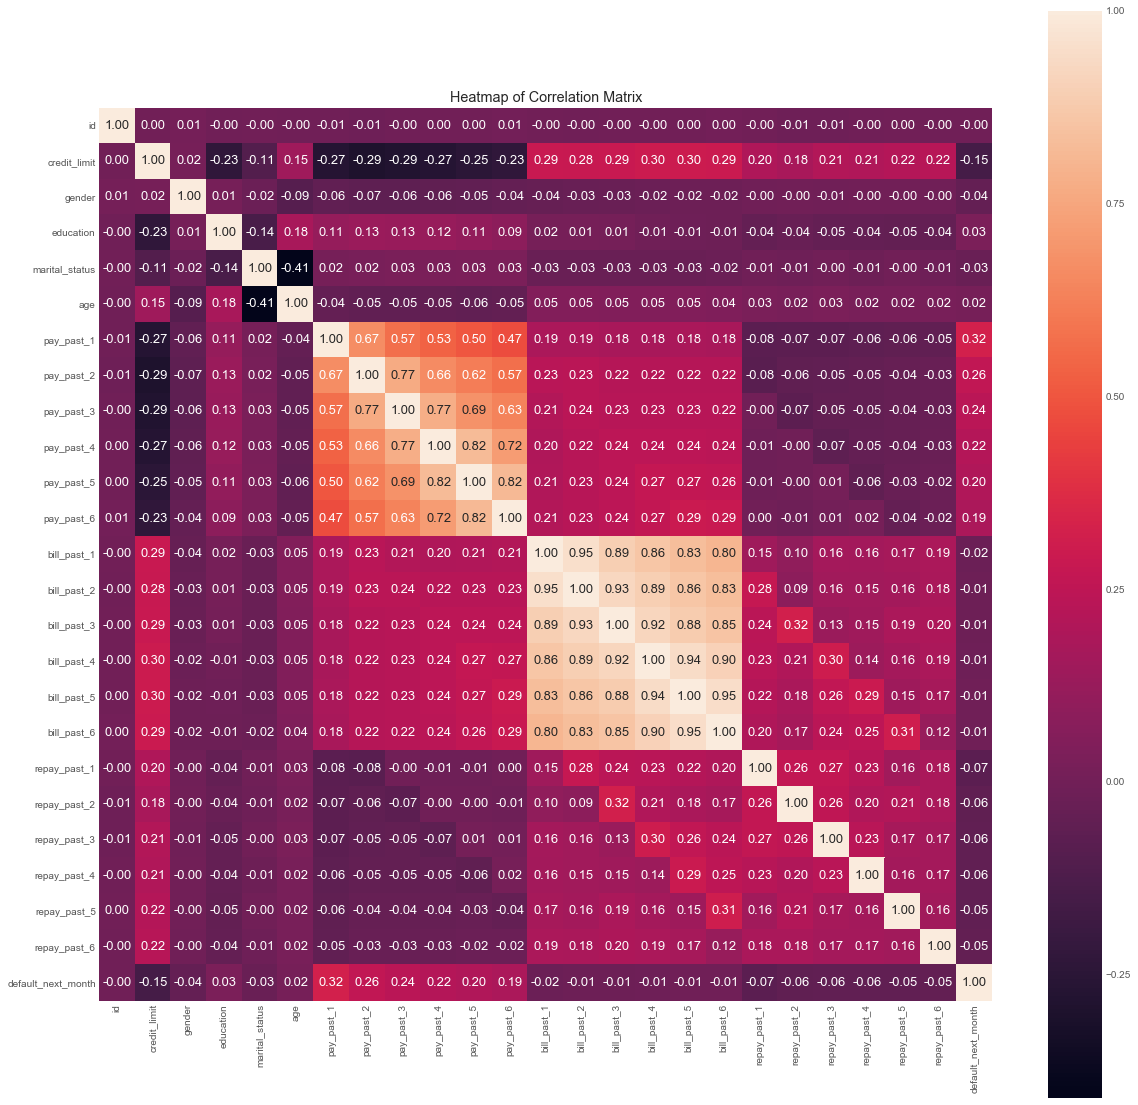

In [346]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

### Feature engineering

In [347]:
# 1. Create new columns for total bill amount and total repayment for all clients
# Feature 1: Row sums of features 12:17 and 18:23
df['billamt_rowsum'] = df.iloc[:,12:18].sum(axis=1)

df['payamt_rowsum'] = df.iloc[:,18:-1].sum(axis=1)

# Feature 2: Row variances of features 12:17 and 18:23. 
df['billamt_rowvar'] = df.iloc[:,12:18].std(axis=1) / 5

df['payamy_rowvar'] = df.iloc[:,18:-1].std(axis=1) / 5

# 3.5 Count of number of zeros in rows
df['rowzeros'] = (df.iloc[:,12:24] == 0).sum(axis=1)


In [348]:
# help function
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

In [349]:
from math import log

# average and standard deviation payment status
df['pay_past_avg'] = df[selcols('pay_past_')].mean(axis=1)
#df['pay_past_std'] = df[selcols('pay_past_')].std(axis=1)

In [350]:
# average payment
df['repay_past_avg']     = df[selcols('repay_past_')].mean(axis=1)

# log of average
df['repay_past_avg_log'] = df['repay_past_avg'].apply(lambda x: log(x+1))

#amounts relative to the average payment
#for i in np.arange(1,7):
    #df['pay_relamt'+str(i)] = df['repay_past_'+str(i)]/df['repay_past_avg']

# log of payments
for i in np.arange(1,7):
    df['pay_amt_log'+str(i)] = df['repay_past_'+str(i)].apply(lambda x: log(x+1))


In [351]:
# average bill
df['bill_amt_avg'] = df[selcols('bill_past_')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,7):
    df['bill_amt_sign'+str(i)] = df['bill_past_'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,7):
    df['bill_amt_log'+str(i)] = df['bill_past_'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
    
#bill amounts relative to the limit
for i in np.arange(1,7):
    df['bill_relamt'+str(i)] = df['bill_past_'+str(i)]/df['credit_limit']


In [352]:
#log of credit limit
df['limit_bal_log'] = df['credit_limit'].apply(lambda x: log(x+1))
df['limit_bal_cat'] = pd.cut(df['credit_limit'], range(0, int(1e6), 10000), right=False)

In [353]:
df['PayBill1']=df['bill_past_1']*df['pay_past_1']
df['PayBill2']=df['bill_past_2']*df['pay_past_2']
df['PayBill3']=df['bill_past_3']*df['pay_past_3']
df['PayBill4']=df['bill_past_4']*df['pay_past_4']
df['PayBill5']=df['bill_past_5']*df['pay_past_5']
df['PayBill6']=df['bill_past_6']*df['pay_past_6']

df['PayPay1']=df['repay_past_1']*df['pay_past_1']
df['PayPay2']=df['repay_past_2']*df['pay_past_2']
df['PayPay3']=df['repay_past_3']*df['pay_past_3']
df['PayPay4']=df['repay_past_4']*df['pay_past_4']
df['PayPay5']=df['repay_past_5']*df['pay_past_5']
df['PayPay6']=df['repay_past_6']*df['pay_past_6']

In [354]:
categorical_vars = ['gender', 'education', 'marital_status']
#,'pay_past_1', 'pay_past_2', 'pay_past_3', 'pay_past_4', 'pay_past_5', 'pay_past_6']

# Cast values in the categorical columns as type str.
df[categorical_vars] = df[categorical_vars].astype(str)

df = pd.get_dummies(df,columns=categorical_vars)
df = pd.get_dummies(df,columns=['limit_bal_cat'])

In [355]:
df.shape

(24001, 178)

### Modelization

In [356]:
Y = df.default_next_month
X = df.drop(['id', 'default_next_month'], axis=1)

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


In [358]:
# Commençons par importer les classifieurs

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [359]:
def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], X_train, y_train, cv=3,scoring='roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))


In [318]:
clfs = {}
clfs['gbc'] = {'clf': GradientBoostingClassifier(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestClassifier( n_jobs=-1), 'name':'RandomForest'}
clfs['tree'] = {'clf': DecisionTreeClassifier(), 'name':'DecisionTreeClassifier'}
#clfs['svc'] = {'clf': SVC(), 'name': 'SupportVectorClassifier'}
clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}


Evaluation(clfs)

GradientBoostingClassifier: 0.8021 (+/- 0.0138)
RandomForest: 0.7518 (+/- 0.0167)
DecisionTreeClassifier: 0.6329 (+/- 0.0118)
KNeighborsClassifier: 0.6989 (+/- 0.0087)


## Gradient Boosting is the best model that i choice.

Turning hyperparameter

In [360]:
"""from sklearn.grid_search import GridSearchCV

#Attention, cela peut être long !
model = GradientBoostingClassifier()

params = {
    'n_estimators' : [1000, 12000],
    'max_depth' : [5,6,7, 8],
    'learning_rate':[0.001, 0.005,0.05,0.1]}

grid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)
grid.fit(X_train,y_train) """

"from sklearn.grid_search import GridSearchCV\n\n#Attention, cela peut être long !\nmodel = GradientBoostingClassifier()\n\nparams = {\n    'n_estimators' : [1000, 12000],\n    'max_depth' : [5,6,7, 8],\n    'learning_rate':[0.001, 0.005,0.05,0.1]}\n\ngrid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)\ngrid.fit(X_train,y_train) "

In [361]:
"""print ('Résultat de la grid search :', grid.best_score_, grid.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid.best_estimator_

print ('Performance du modèle optimisé :', roc_auc_score(y_test,best.predict_proba(X_test)[:,1]))
# 5% de précision en plus !"""

"print ('Résultat de la grid search :', grid.best_score_, grid.best_params_)\n\n##On peut récupérer le meilleur modèle : \nbest = grid.best_estimator_\n\nprint ('Performance du modèle optimisé :', roc_auc_score(y_test,best.predict_proba(X_test)[:,1]))\n# 5% de précision en plus !"

Performance du modèle : 0.8131581065168958


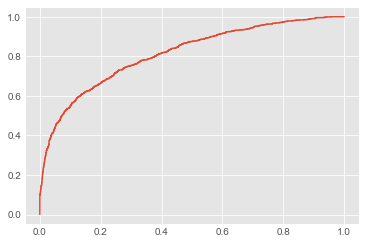

In [362]:
#Le meilleur modèle est le GradientBoosting.
best = GradientBoostingClassifier(learning_rate = 0.005, max_depth = 6 , n_estimators = 1000, min_samples_leaf = 200)
best.fit(X_train,y_train)
pred = best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, pred)
plt.plot(fpr,tpr);
print ('Performance du modèle :', roc_auc_score(y_test,pred))
# (learning_rate = 0.005, max_depth = 5 , n_estimators = 1000, min_samples_leaf = 200) = 79.13
#best = GradientBoostingClassifier(learning_rate = 0.006, max_depth = 5 , n_estimators = 1200, min_samples_leaf = 200) 79.14

In [366]:
#Le meilleur modèle est le GradientBoosting.
best = GradientBoostingClassifier(learning_rate = 0.005, max_depth = 6 , n_estimators = 1000, min_samples_leaf = 200)
best.fit(X,Y)
#pred = best.predict_proba(X_test)[:,1]
#fpr, tpr, _ = roc_curve(y_test, pred)
#plt.plot(fpr,tpr);
#print ('Performance du modèle :', roc_auc_score(y_test,pred))
# (learning_rate = 0.005, max_depth = 5 , n_estimators = 1000, min_samples_leaf = 200) = 79.13
#best = GradientBoostingClassifier(learning_rate = 0.006, max_depth = 5 , n_estimators = 1200, min_samples_leaf = 200) 79.14

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Feature engineering of credit_default_public_leaderboard

In [367]:
df = pd.read_csv('credit_default_public_leaderboard.csv', sep=",")

ID=df.pop('id').values
df.shape

(5999, 23)

In [368]:
# 1. Create new columns for total bill amount and total repayment for all clients
# Feature 1: Row sums of features 12:17 and 18:23
df['billamt_rowsum'] = df.iloc[:,12:18].sum(axis=1)

df['payamt_rowsum'] = df.iloc[:,18:-1].sum(axis=1)

# Feature 2: Row variances of features 12:17 and 18:23. 
df['billamt_rowvar'] = df.iloc[:,12:18].std(axis=1) / 5

df['payamy_rowvar'] = df.iloc[:,18:-1].std(axis=1) / 5

# 3.5 Count of number of zeros in rows
df['rowzeros'] = (df.iloc[:,12:24] == 0).sum(axis=1)


In [369]:
# help function
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

In [370]:
from math import log

# average and standard deviation payment status
df['pay_past_avg'] = df[selcols('pay_past_')].mean(axis=1)
#df['pay_past_std'] = df[selcols('pay_past_')].std(axis=1)

In [371]:
# average payment
df['repay_past_avg']     = df[selcols('repay_past_')].mean(axis=1)

# log of average
df['repay_past_avg_log'] = df['repay_past_avg'].apply(lambda x: log(x+1))

#amounts relative to the average payment
#for i in np.arange(1,7):
    #df['pay_relamt'+str(i)] = df['repay_past_'+str(i)]/df['repay_past_avg']

# log of payments
for i in np.arange(1,7):
    df['pay_amt_log'+str(i)] = df['repay_past_'+str(i)].apply(lambda x: log(x+1))



In [372]:
# average bill
df['bill_amt_avg'] = df[selcols('bill_past_')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,7):
    df['bill_amt_sign'+str(i)] = df['bill_past_'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,7):
    df['bill_amt_log'+str(i)] = df['bill_past_'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
    
#bill amounts relative to the limit
for i in np.arange(1,7):
    df['bill_relamt'+str(i)] = df['bill_past_'+str(i)]/df['credit_limit']


In [373]:
#log of credit limit
df['limit_bal_log'] = df['credit_limit'].apply(lambda x: log(x+1))
df['limit_bal_cat'] = pd.cut(df['credit_limit'], range(0, int(1e6), 10000), right=False)

In [374]:
df['PayBill1']=df['bill_past_1']*df['pay_past_1']
df['PayBill2']=df['bill_past_2']*df['pay_past_2']
df['PayBill3']=df['bill_past_3']*df['pay_past_3']
df['PayBill4']=df['bill_past_4']*df['pay_past_4']
df['PayBill5']=df['bill_past_5']*df['pay_past_5']
df['PayBill6']=df['bill_past_6']*df['pay_past_6']

df['PayPay1']=df['repay_past_1']*df['pay_past_1']
df['PayPay2']=df['repay_past_2']*df['pay_past_2']
df['PayPay3']=df['repay_past_3']*df['pay_past_3']
df['PayPay4']=df['repay_past_4']*df['pay_past_4']
df['PayPay5']=df['repay_past_5']*df['pay_past_5']
df['PayPay6']=df['repay_past_6']*df['pay_past_6']

In [375]:
categorical_vars = ['gender', 'education', 'marital_status']
#,'pay_past_1', 'pay_past_2', 'pay_past_3', 'pay_past_4', 'pay_past_5', 'pay_past_6']

# Cast values in the categorical columns as type str.
df[categorical_vars] = df[categorical_vars].astype(str)

df = pd.get_dummies(df,columns=categorical_vars)
df = pd.get_dummies(df,columns=['limit_bal_cat'])

In [376]:
print(X.shape, df.shape)

(24001, 176) (5999, 176)


In [377]:
best_preds = best.predict_proba(df)[:,1]
#Saving results to csv file
pd.DataFrame({'ID': ID,'Predictions': best_preds}).to_csv('result.csv', index=False)

## THANK YOU